In [51]:
import pandas as pd
from sklearn.datasets import  load_iris
from CustomFunctions import split_data
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from six import StringIO

In [38]:
iris = load_iris()
X, y = iris.data, iris.target

In [39]:
train_X, train_y, val_X, val_y = split_data(X, y)
print(len(train_X), len(val_X))
print(len(train_y), len(val_y))

120 30
120 30


In [40]:
from DecisionTreesModel import treeModel

In [34]:
treeModel.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.034, criterion='entropy', max_depth=6,
                       min_samples_leaf=5, random_state=12)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(val_y, treeModel.predict(val_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



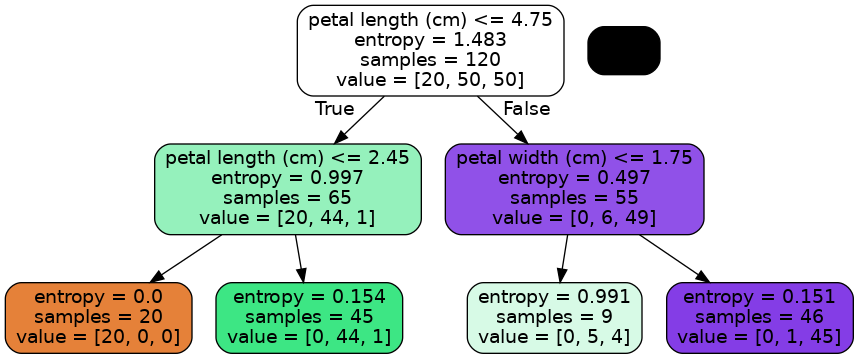

In [52]:
dot_data = StringIO()
export_graphviz(treeModel, out_file=dot_data,feature_names=iris.feature_names,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())